In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
# Create a sample dataset with customer annual income, spending score, and age
data = {
    'AnnualIncome': [
        15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35,   # Normal points
        80, 85, 90  # Outliers
    ],
    'SpendingScore': [
        39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96,
        6, 9, 12, 15, 18, 21, 24, 27, 30, 33,
        5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
        56,   # Normal points
        2, 3, 100  # Outliers
    ],
    'Age': [
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35, 35.5, 36, 36.5, 37, 37.5, 38, 38.5, 39, 39.5, 
        40,   # Normal points
        15, 60, 70  # Outliers
    ]
}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore   Age
0          15.0             39  20.0
1          15.5             42  20.5
2          16.0             45  21.0
3          16.5             48  21.5
4          17.0             51  22.0


In [3]:
# Normalize the data
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

# Convert back to DataFrame for easy handling
df_scaled = pd.DataFrame(scaled, columns=['AnnualIncome', 'SpendingScore','Age'])

print(df_scaled.head())

   AnnualIncome  SpendingScore       Age
0     -0.869761      -0.135877 -1.166678
1     -0.838899      -0.033387 -1.114825
2     -0.808036       0.069103 -1.062973
3     -0.777174       0.171594 -1.011121
4     -0.746311       0.274084 -0.959268


In [4]:
# Apply PCA to reduce dimensions from 3 to 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled)

# Convert back to DataFrame for easy handling
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
print(df_pca.head())

       PCA1      PCA2
0 -1.324642 -0.590673
1 -1.300977 -0.474300
2 -1.277312 -0.357927
3 -1.253647 -0.241554
4 -1.229982 -0.125181


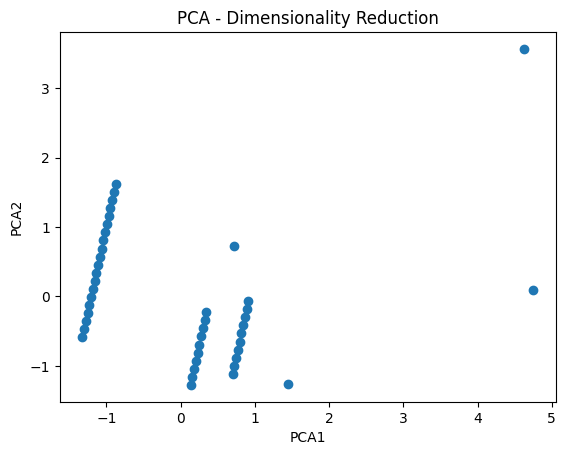

In [5]:
# Plot the PCA components
plt.scatter(df_pca['PCA1'], df_pca['PCA2'])
plt.title('PCA - Dimensionality Reduction')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [6]:
# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
df_tsne = tsne.fit_transform(scaled)

# Convert the t-SNE result back to a DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=['t-SNE1', 't-SNE2'])
print(df_tsne.head())

      t-SNE1      t-SNE2
0  -8.626333  132.455704
1  -6.954533  122.494347
2 -16.487232  117.027298
3 -24.738333  108.902702
4 -33.278656  100.154373


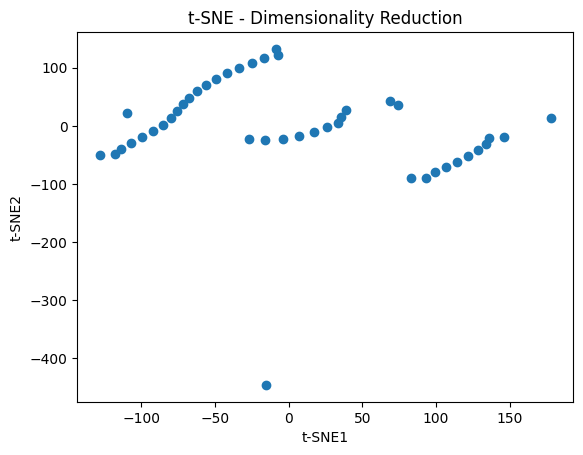

In [7]:
# Plot the t-SNE components
plt.scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'])
plt.title('t-SNE - Dimensionality Reduction')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()